In [251]:
import numpy as np
import pandas as pd
import itertools as it

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import metrics
import xgboost as xgb
# xgb.set_config(verbosity=0)
from xgboost import plot_tree
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import roc_curve, auc, roc_auc_score

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

order_new = pd.read_csv("orders_new.csv")
order_product_prior = pd.read_csv("order_products_prior.csv")


In [252]:
us_feature2 = pd.read_csv("../model_data/up_feature2.csv")
us_feature2

,user_id,product_id,user_orders,sum_days_since_prior_order,avg_days_since_prior_order,total_products,distinct_products,reordered_ratio,up_orders,up_first_order,up_last_order,up_average_cart_position,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order
0,1,196,10,176.0,17.600000,59,18,0.333333,10,1,10,1.400000,35791,0.582500,2.0,0.223520,5.900000,1.000000,0,1.000000
1,1,10258,10,176.0,17.600000,59,18,0.333333,9,2,10,3.333333,1946,0.552962,2.0,0.286228,5.900000,0.900000,0,1.000000
2,1,10326,10,176.0,17.600000,59,18,0.333333,1,5,5,5.000000,5526,0.521581,2.0,0.347991,5.900000,0.100000,5,0.166667
3,1,12427,10,176.0,17.600000,59,18,0.333333,10,1,10,3.300000,6476,0.529482,2.0,0.259265,5.900000,1.000000,0,1.000000
4,1,13032,10,176.0,17.600000,59,18,0.333333,3,2,10,6.333333,3751,0.479782,2.0,0.342842,5.900000,0.300000,0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307948,206209,43961,13,210.0,16.153846,129,68,0.586207,3,4,12,8.000000,55371,0.514642,2.0,0.369417,9.923077,0.230769,1,0.300000
13307949,206209,44325,13,210.0,16.153846,129,68,0.586207,1,7,7,8.000000,3485,0.289890,2.0,0.598852,9.923077,0.076923,6,0.142857
13307950,206209,48370,13,210.0,16.153846,129,68,0.586207,1,11,11,8.000000,3934,0.592561,2.0,0.300712,9.923077,0.076923,2,0.333333
13307951,206209,48697,13,210.0,16.153846,129,68,0.586207,1,7,7,6.000000,9783,0.260662,2.0,0.642339,9.923077,0.076923,6,0.142857


In [253]:
order_new

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,eval_set
0,2539329,1,1,2,8,NaN,prior
1,2398795,1,2,3,7,15.0,prior
2,473747,1,3,3,12,21.0,prior
3,2254736,1,4,4,7,29.0,prior
4,431534,1,5,4,15,28.0,prior
...,...,...,...,...,...,...,...
3421078,2266710,206209,10,5,18,29.0,prior
3421079,1854736,206209,11,4,10,30.0,prior
3421080,626363,206209,12,1,12,18.0,prior
3421081,2977660,206209,13,1,12,7.0,prior


In [254]:
order_new[order_new["eval_set"] == "train"]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,eval_set
10,1187899,1,11,4,8,14.0,train
25,1492625,2,15,1,11,30.0,train
49,2196797,5,5,0,11,6.0,train
74,525192,7,21,2,11,6.0,train
78,880375,8,4,1,14,10.0,train
...,...,...,...,...,...,...,...
3420838,2585586,206199,20,2,16,30.0,train
3420862,943915,206200,24,6,19,6.0,train
3420924,2371631,206203,6,4,19,30.0,train
3420933,1716008,206205,4,1,16,10.0,train


In [255]:
order_new[order_new["eval_set"] == "test"]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,eval_set
38,2774568,3,13,5,15,11.0,test
44,329954,4,6,3,12,30.0,test
53,1528013,6,4,3,16,22.0,test
96,1376945,11,8,6,11,8.0,test
102,1356845,12,6,1,20,30.0,test
...,...,...,...,...,...,...,...
3420918,2728930,206202,23,2,17,6.0,test
3420929,350108,206204,5,4,14,14.0,test
3421001,1043943,206206,68,0,20,0.0,test
3421018,2821651,206207,17,2,13,14.0,test


In [256]:
order_new[order_new["eval_set"] == "prior"]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,eval_set
0,2539329,1,1,2,8,NaN,prior
1,2398795,1,2,3,7,15.0,prior
2,473747,1,3,3,12,21.0,prior
3,2254736,1,4,4,7,29.0,prior
4,431534,1,5,4,15,28.0,prior
...,...,...,...,...,...,...,...
3421077,2558525,206209,9,4,15,22.0,prior
3421078,2266710,206209,10,5,18,29.0,prior
3421079,1854736,206209,11,4,10,30.0,prior
3421080,626363,206209,12,1,12,18.0,prior


In [257]:
order_new = order_new[order_new["eval_set"] != "prior" ]
order_new

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,eval_set
10,1187899,1,11,4,8,14.0,train
25,1492625,2,15,1,11,30.0,train
38,2774568,3,13,5,15,11.0,test
44,329954,4,6,3,12,30.0,test
49,2196797,5,5,0,11,6.0,train
...,...,...,...,...,...,...,...
3420933,1716008,206205,4,1,16,10.0,train
3421001,1043943,206206,68,0,20,0.0,test
3421018,2821651,206207,17,2,13,14.0,test
3421068,803273,206208,50,5,11,4.0,test


In [258]:
order_new = order_new.drop(["order_number", "order_dow", "order_hour_of_day", "days_since_prior_order"], axis=1)
order_new

,order_id,user_id,eval_set
10,1187899,1,train
25,1492625,2,train
38,2774568,3,test
44,329954,4,test
49,2196797,5,train
...,...,...,...
3420933,1716008,206205,train
3421001,1043943,206206,test
3421018,2821651,206207,test
3421068,803273,206208,test


### Based on the dataframe created in feature engineering 2, left join with the orders_new table (you just need column user_id and eval_set) where the orders are not from the prior eval_set. 

In [259]:
us_feature2 = pd.merge(us_feature2, order_new, how="left", on="user_id")
us_feature2

,user_id,product_id,user_orders,sum_days_since_prior_order,avg_days_since_prior_order,total_products,distinct_products,reordered_ratio,up_orders,up_first_order,...,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order,order_id,eval_set
0,1,196,10,176.0,17.600000,59,18,0.333333,10,1,...,35791,0.582500,2.0,0.223520,5.900000,1.000000,0,1.000000,1187899,train
1,1,10258,10,176.0,17.600000,59,18,0.333333,9,2,...,1946,0.552962,2.0,0.286228,5.900000,0.900000,0,1.000000,1187899,train
2,1,10326,10,176.0,17.600000,59,18,0.333333,1,5,...,5526,0.521581,2.0,0.347991,5.900000,0.100000,5,0.166667,1187899,train
3,1,12427,10,176.0,17.600000,59,18,0.333333,10,1,...,6476,0.529482,2.0,0.259265,5.900000,1.000000,0,1.000000,1187899,train
4,1,13032,10,176.0,17.600000,59,18,0.333333,3,2,...,3751,0.479782,2.0,0.342842,5.900000,0.300000,0,0.333333,1187899,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307948,206209,43961,13,210.0,16.153846,129,68,0.586207,3,4,...,55371,0.514642,2.0,0.369417,9.923077,0.230769,1,0.300000,272231,train
13307949,206209,44325,13,210.0,16.153846,129,68,0.586207,1,7,...,3485,0.289890,2.0,0.598852,9.923077,0.076923,6,0.142857,272231,train
13307950,206209,48370,13,210.0,16.153846,129,68,0.586207,1,11,...,3934,0.592561,2.0,0.300712,9.923077,0.076923,2,0.333333,272231,train
13307951,206209,48697,13,210.0,16.153846,129,68,0.586207,1,7,...,9783,0.260662,2.0,0.642339,9.923077,0.076923,6,0.142857,272231,train


###  Split the dataset into two, one for train and one for test based on column eval_set

In [260]:
train = us_feature2[us_feature2["eval_set"] == "train"]
test = us_feature2[us_feature2["eval_set"] == "test"]

In [261]:
train

,user_id,product_id,user_orders,sum_days_since_prior_order,avg_days_since_prior_order,total_products,distinct_products,reordered_ratio,up_orders,up_first_order,...,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order,order_id,eval_set
0,1,196,10,176.0,17.600000,59,18,0.333333,10,1,...,35791,0.582500,2.0,0.223520,5.900000,1.000000,0,1.000000,1187899,train
1,1,10258,10,176.0,17.600000,59,18,0.333333,9,2,...,1946,0.552962,2.0,0.286228,5.900000,0.900000,0,1.000000,1187899,train
2,1,10326,10,176.0,17.600000,59,18,0.333333,1,5,...,5526,0.521581,2.0,0.347991,5.900000,0.100000,5,0.166667,1187899,train
3,1,12427,10,176.0,17.600000,59,18,0.333333,10,1,...,6476,0.529482,2.0,0.259265,5.900000,1.000000,0,1.000000,1187899,train
4,1,13032,10,176.0,17.600000,59,18,0.333333,3,2,...,3751,0.479782,2.0,0.342842,5.900000,0.300000,0,0.333333,1187899,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307948,206209,43961,13,210.0,16.153846,129,68,0.586207,3,4,...,55371,0.514642,2.0,0.369417,9.923077,0.230769,1,0.300000,272231,train
13307949,206209,44325,13,210.0,16.153846,129,68,0.586207,1,7,...,3485,0.289890,2.0,0.598852,9.923077,0.076923,6,0.142857,272231,train
13307950,206209,48370,13,210.0,16.153846,129,68,0.586207,1,11,...,3934,0.592561,2.0,0.300712,9.923077,0.076923,2,0.333333,272231,train
13307951,206209,48697,13,210.0,16.153846,129,68,0.586207,1,7,...,9783,0.260662,2.0,0.642339,9.923077,0.076923,6,0.142857,272231,train


### Left join with order_products_new table where eval_set is train, the reordered column will be the target varaible, set the value for reordered column to be 0 for products that are not ordered in the most recent order.

In [262]:
order_product_new = pd.read_csv("../model_data/order_products_new.csv")
order_product_new

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
33819101,3421063,14233,3,1
33819102,3421063,35548,4,1
33819103,3421070,35951,1,1
33819104,3421070,16953,2,1


In [263]:
order_new

,order_id,user_id,eval_set
10,1187899,1,train
25,1492625,2,train
38,2774568,3,test
44,329954,4,test
49,2196797,5,train
...,...,...,...
3420933,1716008,206205,train
3421001,1043943,206206,test
3421018,2821651,206207,test
3421068,803273,206208,test


In [264]:
order_train = order_new[order_new["eval_set"] == "train"]
join = pd.merge(order_train, order_product_new, on="order_id", how="left")

In [265]:
join

,order_id,user_id,eval_set,product_id,add_to_cart_order,reordered
0,1187899,1,train,196,1,1
1,1187899,1,train,25133,2,1
2,1187899,1,train,38928,3,1
3,1187899,1,train,26405,4,1
4,1187899,1,train,39657,5,1
...,...,...,...,...,...,...
1384612,272231,206209,train,40603,4,0
1384613,272231,206209,train,15655,5,0
1384614,272231,206209,train,42606,6,0
1384615,272231,206209,train,37966,7,0


In [266]:
order_train = pd.DataFrame({"user_id": join["user_id"], 
                            "product_id": join["product_id"], 
                            "reordered": join["reordered"]})

In [267]:
order_train["reordered"].isna().sum()

0

In [268]:
order_train

,user_id,product_id,reordered
0,1,196,1
1,1,25133,1
2,1,38928,1
3,1,26405,1
4,1,39657,1
...,...,...,...
1384612,206209,40603,0
1384613,206209,15655,0
1384614,206209,42606,0
1384615,206209,37966,0


In [269]:
order_train["reordered"].value_counts()

1    828824
0    555793
Name: reordered, dtype: int64

In [270]:
train

,user_id,product_id,user_orders,sum_days_since_prior_order,avg_days_since_prior_order,total_products,distinct_products,reordered_ratio,up_orders,up_first_order,...,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order,order_id,eval_set
0,1,196,10,176.0,17.600000,59,18,0.333333,10,1,...,35791,0.582500,2.0,0.223520,5.900000,1.000000,0,1.000000,1187899,train
1,1,10258,10,176.0,17.600000,59,18,0.333333,9,2,...,1946,0.552962,2.0,0.286228,5.900000,0.900000,0,1.000000,1187899,train
2,1,10326,10,176.0,17.600000,59,18,0.333333,1,5,...,5526,0.521581,2.0,0.347991,5.900000,0.100000,5,0.166667,1187899,train
3,1,12427,10,176.0,17.600000,59,18,0.333333,10,1,...,6476,0.529482,2.0,0.259265,5.900000,1.000000,0,1.000000,1187899,train
4,1,13032,10,176.0,17.600000,59,18,0.333333,3,2,...,3751,0.479782,2.0,0.342842,5.900000,0.300000,0,0.333333,1187899,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307948,206209,43961,13,210.0,16.153846,129,68,0.586207,3,4,...,55371,0.514642,2.0,0.369417,9.923077,0.230769,1,0.300000,272231,train
13307949,206209,44325,13,210.0,16.153846,129,68,0.586207,1,7,...,3485,0.289890,2.0,0.598852,9.923077,0.076923,6,0.142857,272231,train
13307950,206209,48370,13,210.0,16.153846,129,68,0.586207,1,11,...,3934,0.592561,2.0,0.300712,9.923077,0.076923,2,0.333333,272231,train
13307951,206209,48697,13,210.0,16.153846,129,68,0.586207,1,7,...,9783,0.260662,2.0,0.642339,9.923077,0.076923,6,0.142857,272231,train


In [271]:
final = pd.merge(train, order_train, how="left")

In [272]:
final

,user_id,product_id,user_orders,sum_days_since_prior_order,avg_days_since_prior_order,total_products,distinct_products,reordered_ratio,up_orders,up_first_order,...,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order,order_id,eval_set,reordered
0,1,196,10,176.0,17.600000,59,18,0.333333,10,1,...,0.582500,2.0,0.223520,5.900000,1.000000,0,1.000000,1187899,train,1.0
1,1,10258,10,176.0,17.600000,59,18,0.333333,9,2,...,0.552962,2.0,0.286228,5.900000,0.900000,0,1.000000,1187899,train,1.0
2,1,10326,10,176.0,17.600000,59,18,0.333333,1,5,...,0.521581,2.0,0.347991,5.900000,0.100000,5,0.166667,1187899,train,NaN
3,1,12427,10,176.0,17.600000,59,18,0.333333,10,1,...,0.529482,2.0,0.259265,5.900000,1.000000,0,1.000000,1187899,train,NaN
4,1,13032,10,176.0,17.600000,59,18,0.333333,3,2,...,0.479782,2.0,0.342842,5.900000,0.300000,0,0.333333,1187899,train,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8474656,206209,43961,13,210.0,16.153846,129,68,0.586207,3,4,...,0.514642,2.0,0.369417,9.923077,0.230769,1,0.300000,272231,train,NaN
8474657,206209,44325,13,210.0,16.153846,129,68,0.586207,1,7,...,0.289890,2.0,0.598852,9.923077,0.076923,6,0.142857,272231,train,NaN
8474658,206209,48370,13,210.0,16.153846,129,68,0.586207,1,11,...,0.592561,2.0,0.300712,9.923077,0.076923,2,0.333333,272231,train,NaN
8474659,206209,48697,13,210.0,16.153846,129,68,0.586207,1,7,...,0.260662,2.0,0.642339,9.923077,0.076923,6,0.142857,272231,train,NaN


In [273]:
final["eval_set"].unique()

array(['train'], dtype=object)

In [274]:
final["reordered"] = final["reordered"].fillna(0)

In [275]:
final["reordered"].unique()

array([1., 0.])

In [276]:
final = final.drop("eval_set", axis=1)
final

,user_id,product_id,user_orders,sum_days_since_prior_order,avg_days_since_prior_order,total_products,distinct_products,reordered_ratio,up_orders,up_first_order,...,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order,order_id,reordered
0,1,196,10,176.0,17.600000,59,18,0.333333,10,1,...,35791,0.582500,2.0,0.223520,5.900000,1.000000,0,1.000000,1187899,1.0
1,1,10258,10,176.0,17.600000,59,18,0.333333,9,2,...,1946,0.552962,2.0,0.286228,5.900000,0.900000,0,1.000000,1187899,1.0
2,1,10326,10,176.0,17.600000,59,18,0.333333,1,5,...,5526,0.521581,2.0,0.347991,5.900000,0.100000,5,0.166667,1187899,0.0
3,1,12427,10,176.0,17.600000,59,18,0.333333,10,1,...,6476,0.529482,2.0,0.259265,5.900000,1.000000,0,1.000000,1187899,0.0
4,1,13032,10,176.0,17.600000,59,18,0.333333,3,2,...,3751,0.479782,2.0,0.342842,5.900000,0.300000,0,0.333333,1187899,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8474656,206209,43961,13,210.0,16.153846,129,68,0.586207,3,4,...,55371,0.514642,2.0,0.369417,9.923077,0.230769,1,0.300000,272231,0.0
8474657,206209,44325,13,210.0,16.153846,129,68,0.586207,1,7,...,3485,0.289890,2.0,0.598852,9.923077,0.076923,6,0.142857,272231,0.0
8474658,206209,48370,13,210.0,16.153846,129,68,0.586207,1,11,...,3934,0.592561,2.0,0.300712,9.923077,0.076923,2,0.333333,272231,0.0
8474659,206209,48697,13,210.0,16.153846,129,68,0.586207,1,7,...,9783,0.260662,2.0,0.642339,9.923077,0.076923,6,0.142857,272231,0.0


In [277]:
sample_df = final.sample(frac=0.01, random_state=99)
sample_df

,user_id,product_id,user_orders,sum_days_since_prior_order,avg_days_since_prior_order,total_products,distinct_products,reordered_ratio,up_orders,up_first_order,...,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order,order_id,reordered
8091908,196719,30827,19,246.0,12.947368,262,135,0.579399,1,2,...,13571,0.552011,2.0,0.274851,13.789474,0.052632,17,0.055556,478890,0.0
4354404,105500,7485,19,246.0,12.947368,291,83,0.295374,5,3,...,8179,0.429192,2.0,0.422179,15.315789,0.263158,7,0.294118,1803356,0.0
1058380,25683,35418,8,198.0,24.750000,170,116,0.743590,1,2,...,534,0.350806,2.0,0.464419,21.250000,0.125000,6,0.142857,1287003,0.0
2303133,56102,43379,20,212.0,10.600000,126,73,0.608333,1,18,...,608,0.357664,2.0,0.450658,6.300000,0.050000,2,0.333333,1968351,0.0
6289206,153033,44479,36,253.0,7.027778,296,125,0.464684,2,19,...,7924,0.463729,2.0,0.372287,8.222222,0.055556,7,0.111111,1401017,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055902,50095,28842,50,361.0,7.220000,388,146,0.381201,3,14,...,45530,0.455147,2.0,0.431649,7.760000,0.060000,16,0.081081,611275,0.0
7337093,178443,9154,48,350.0,7.291667,570,219,0.389680,1,1,...,1371,0.363793,2.0,0.423049,11.875000,0.020833,47,0.020833,1118480,0.0
5538608,134585,24427,8,85.0,10.625000,57,35,0.714286,1,4,...,3899,0.419576,2.0,0.411388,7.125000,0.125000,4,0.200000,314760,0.0
5720513,139048,10753,18,166.0,9.222222,145,74,0.532374,6,2,...,5345,0.576687,2.0,0.243966,8.055556,0.333333,1,0.352941,396373,1.0


In [278]:
X = sample_df.drop(["reordered"], axis=1)
y = sample_df['reordered']

In [279]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [280]:
xgb_train = xgb.DMatrix(data=X_train,label=y_train)
xgb_test = xgb.DMatrix(data=X_test,label=y_test)

In [281]:
param_grid = {
             'gamma':[0.1], 
             'max_depth':[6],
             'lambda':[1, 4],
             'subsample':[0.5],
             'colsamaple_bytree':[0.7], 
             'min_child_weight':[4],
             'eta': [0.08]
            }

In [282]:
s = sorted(param_grid)
print(s)
combination = it.product(*(param_grid[Name] for Name in s))
ls = list(combination)

['colsamaple_bytree', 'eta', 'gamma', 'lambda', 'max_depth', 'min_child_weight', 'subsample']


In [283]:
def kfold_index(X_train, k):
    if k < 1:
        print("K cannot be smaller than 1.")
    else:
        l = X_train.shape[0]
        tail = l % k
        q = l // k
        index = [0]
        output_index = []
        
        for i in range(1, tail):
            index.append(i*q + 1)
        for j in range(tail, k+1):
            index.append(j*q + tail)
        for m in range(len(index) - 1):
            output_index.append([index[m], index[m+1]])
        
        return output_index

In [284]:
def cv(X_train, y_train, params, num_rounds, early_stopping_rounds, k):
    index = kfold_index(X_train, k)
    
    auc_score = []
    br = []
    for i in range(k):
        cv_xtest = X_train.iloc[index[i][0]:index[i][1],:]
        cv_ytest = y_train.iloc[index[i][0]:index[i][1],]

        cv_xtrain = X_train.drop(X_train.index[index[i][0]:index[i][1]])
        cv_ytrain = y_train.drop(y_train.index[index[i][0]:index[i][1]])

        xgb_train = xgb.DMatrix(data=cv_xtrain,label=cv_ytrain)
        xgb_test = xgb.DMatrix(data=cv_xtest,label=cv_ytest)


        xgb_model = xgb.train(params=params, 
                              dtrain=xgb_train, 
                              num_boost_round=num_rounds, 
                              early_stopping_rounds=early_stopping_rounds, 
                              evals=[(xgb_test, "test_evalset")],
                              verbose_eval=False)
        
        fpr, tpr, thresholds = metrics.roc_curve(cv_ytest, xgb_model.predict(xgb_test))
        acc = metrics.auc(fpr, tpr)
        auc_score.append(acc)
        
        # get number of boosting round
        bb = xgb_model.best_iteration
        br.append(bb)
   

    return np.mean(auc_score), np.mean(br)

In [ ]:
for i in ls:

    params={
        'booster':'gbtree',
        'objective':'binary:logistic',
        'gamma':i[2], 
        'max_depth':i[4],
        'lambda':i[3], 
        'subsample':i[6],
        'colsamaple_bytree':i[0],
        'min_child_weight':i[5], 
        "silent":0,
        'eta': i[1],
        'seed':1000,
        'nthread':6
    }
    plst = list(params.items())
    num_rounds = 1000
    early_stopping_rounds = 30
    
    sc, num_round = cv(X_train, y_train, 
                       params=plst, 
                       num_rounds=num_rounds, 
                       early_stopping_rounds=early_stopping_rounds,  
                       k=10)

    result = 0
    if sc >= result:
        result = sc
        parameter = i
        mean_num_round = num_round
        
print(result, mean_num_round, parameter)

In [286]:
print(result, mean_num_round, parameter)

0.8258909116864892 79.2 (0.7, 0.08, 0.1, 4, 6, 4, 0.5)


In [287]:
best_param = {
        'booster':'gbtree',
        'objective':'binary:logistic',
        'gamma':parameter[2], 
        'max_depth':parameter[4],
        'lambda':parameter[3], 
        'subsample':parameter[6],
        'colsample_bytree':parameter[0],
        'min_child_weight':parameter[5], 
        'silent':0,
        'eta': parameter[1],
        'seed':1000,
        'nthread':6
    }

In [ ]:
xg_model = xgb.train(params=best_param, 
                     dtrain=xgb_train, 
                     num_boost_round=1000, 
                     early_stopping_rounds=30, 
                     evals=[(xgb_test, "test_evalset")],
                     verbose_eval=False)

In [289]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, xg_model.predict(xgb_test))
acc = metrics.auc(fpr, tpr)
print(acc)

0.8243689616996781


In [292]:
# roc_curve() returns a list of false positive rates (FPR) and true positives rates (TPR) for different configurations of the classifier used to plot the ROC.
[fpr, tpr, thr] = metrics.roc_curve(y_test, xg_model.predict(xgb_test))

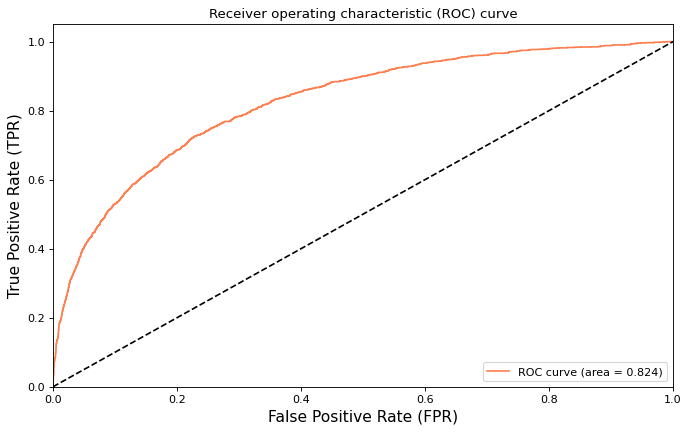

In [293]:
#plot ROC curve
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()